# Script for News Data Analysis

In [1]:
import numpy as np
import pandas as pd

## Load Data

In [2]:
from pymongo import MongoClient

In [3]:
client = MongoClient('mongodb://localhost:27017/somanews')
client.somanews.authenticate('ssomanews', 'ssomanews1029')
db = client.get_database('somanews')
articles = db.get_collection('crawledArticles')

In [4]:
train = pd.DataFrame(list(articles.find()))
client.close()

In [5]:
category = pd.read_pickle("../datastore/category.p")
train = pd.merge(train, category, on='category', how='inner')

## Preprocessing
1. Remove stopwords (regex, hanja)
2. Find all in square bracket
3. NNP to English

In [6]:
from konlpy.tag import Mecab
import hanja
import re

In [7]:
mecab = Mecab()
pos = lambda d: ['/'.join(p) for p in mecab.pos(d)]

In [8]:
title = train['title'].tolist()
title = [re.findall("\[(.*?)\]", each) for each in title]
title = list(filter(None, title))
title = [each[0] for each in title]

In [9]:
category = train['name'].tolist()

## Counting Newsdata

In [10]:
from collections import Counter
from konlpy.utils import pprint

In [11]:
categories = Counter(category).most_common()
print('myCounter:', categories)

myCounter: [('사회', 35710), ('정치', 28320), ('경제', 22877), ('문화', 13402), ('정보없음', 12187), ('스포츠', 11575), ('사설', 9927), ('인물', 8603), ('건강', 2209), ('종합', 1942), ('과학', 1531)]


In [12]:
headlines = Counter(title).most_common(30)
print('myCounter:', headlines)

myCounter: [('사설', 2794), ('포토', 2499), ('부고', 2263), ('인사', 1646), ('카드뉴스', 1468), ('단독', 1364), ('경향포토', 1179), ('Why', 809), ('알립니다', 656), ('화제의 분양현장', 644), ('오늘의 채널A', 454), ('오늘의 운세', 442), ('더 나은 미래', 385), ('오늘의 날씨', 384), ('부음', 369), ('날씨', 360), ('오늘의 경기', 357), ('만물상', 350), ('팔면봉', 349), ('발언대', 327), ('왜냐면', 302), ('스피킹이 강해지는 영어', 292), ('일사일언', 290), ('두근두근 뇌 운동', 288), ('신문으로 배우는 실용한자', 287), ('리빙포인트', 284), ('속보', 276), ('스포츠 브리핑', 263), ('매일매일 중국어 한마디', 263), ('입에 착착 붙는 일본어', 263)]


## Visualization - Graph

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [14]:
x_category = [each[0] for each in categories]
y_category = [each[1] for each in categories]
indexes_category = np.arange(len(categories))

In [15]:
x_headline = [each[0] for each in headlines]
y_headline = [each[1] for each in headlines]
indexes_headline = np.arange(len(headlines))

In [16]:
krfont = {'family':'NanumGothic', 'size': 7}
rc('font', **krfont)

## 주 단위 크롤링 데이터 분석

## 전체 기사에 대한 카테고리 분포 분석
- 의미있는 결과를 내기 위해 가장 빈도가 많이 나타나는 사회, 정치, 경제만 분석

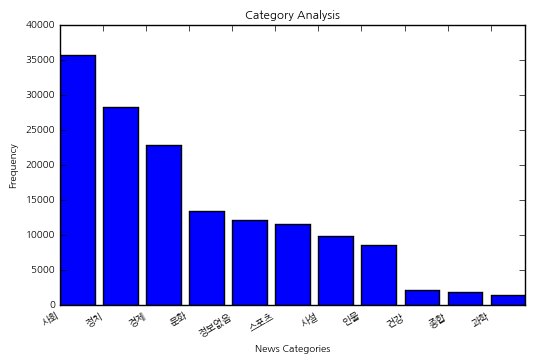

In [17]:
plt.xlabel('News Categories')
plt.ylabel('Frequency')
plt.title('Category Analysis')
plt.xticks(indexes_category, x_category)
plt.bar(indexes_category, y_category)
plt.gcf().autofmt_xdate()
plt.show()

## 뉴스 기사에 대한 태그 분포 분석
- 태그를 왜 제거했나? 빈번하게 등장하기 때문에 의미적인 클러스터링을 방해하는 요인으로 작용
- 개수를 30개에서 더 늘려 최대한 많이 제거할 수 있도록 수정

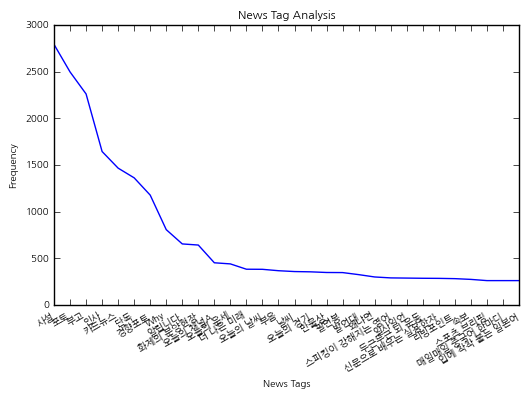

In [18]:
plt.xlabel('News Tags')
plt.ylabel('Frequency')
plt.title('News Tag Analysis')
plt.xticks(indexes_headline, x_headline)
plt.plot(indexes_headline, y_headline)
plt.gcf().autofmt_xdate()
plt.show()